In [145]:
import pytesseract

In [146]:
import cv2

In [147]:
import matplotlib.pyplot as plt

In [148]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\khatr\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [149]:
img = cv2.imread('peanut butter.jpg')

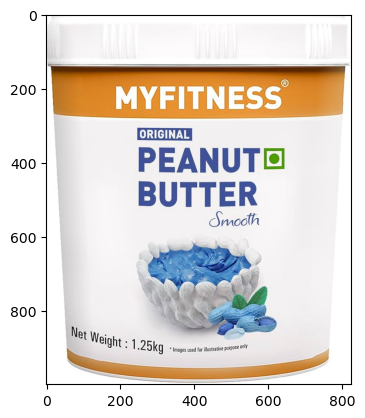

In [150]:
plt.imshow(img)

In [151]:
img2char = pytesseract.image_to_string(img)

In [152]:
print(img2char)

MYFITNESS

ORIGINAL

PEANUT®!
BUTTER

Smooth




In [153]:
img2boxes = pytesseract.image_to_boxes(img)

In [154]:
print(img2boxes)

~ 15 863 820 866 0
M 190 743 246 804 0
Y 252 743 302 804 0
F 309 743 350 804 0
I 359 743 374 804 0
T 382 743 427 804 0
N 435 743 483 804 0
E 495 743 536 804 0
S 541 743 587 805 0
S 591 743 656 823 0
O 254 664 270 687 0
R 274 664 290 687 0
I 294 664 299 687 0
G 303 664 319 687 0
I 323 663 328 686 0
N 332 663 349 687 0
A 352 663 371 686 0
L 374 663 388 686 0
P 250 573 297 640 0
E 306 571 349 640 0
A 353 571 410 639 0
N 417 571 466 638 0
U 477 571 525 638 0
T 533 572 579 638 0
® 562 571 596 640 0
! 589 580 645 638 0
B 250 480 298 549 0
U 307 479 355 547 0
T 362 478 409 546 0
T 414 479 461 546 0
E 469 479 512 547 0
R 523 480 572 547 0
S 441 424 478 467 0
m 474 426 509 446 0
o 509 427 526 447 0
o 527 428 544 448 0
t 540 424 554 467 0
h 543 429 577 462 0
~ 52 8 769 388 0
~ 222 7 544 14 0



In [155]:
imgH, imgW,_ = img.shape

In [156]:
img.shape

(1000, 825, 3)

In [157]:
for boxes in img2boxes.splitlines():
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    cv2.rectangle(img, (x,imgH-y), (w,imgH-h), (255,0,0),3)
    

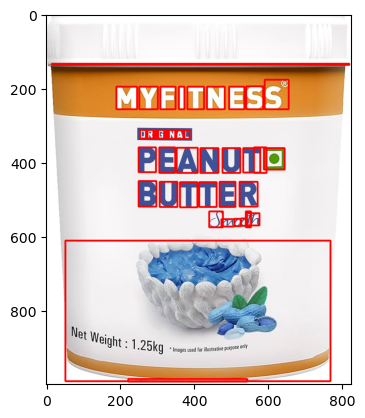

In [158]:
plt.imshow(img)

In [159]:
import cv2
import pytesseract
import numpy as np

# Load the image from file
image_path = "NXP.jpg"
img = cv2.imread(image_path)

# Image Preprocessing Function
def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize image to improve OCR accuracy
    scale_percent = 150  # Increase size by 150%
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(gray, dim, interpolation=cv2.INTER_LINEAR)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)

    # Increase contrast
    alpha = 1.2  # Simple contrast control (1.0-3.0)
    beta = 0    # Simple brightness control (0-100)
    contrast_img = cv2.convertScaleAbs(blurred, alpha=alpha, beta=beta)

    # Apply adaptive thresholding to make text stand out
    thresh_img = cv2.adaptiveThreshold(
        contrast_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    return thresh_img

# Preprocess the image
preprocessed_image = preprocess_image(img)

# Extract text using Tesseract OCR
extracted_text = pytesseract.image_to_string(preprocessed_image)

# Display extracted text
print("Extracted Text:\n", extracted_text)

# Save and display the preprocessed image (for verification)
cv2.imwrite("preprocessed_NXP.jpg", preprocessed_image)
cv2.imshow('Preprocessed Image', preprocessed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Extracted Text:
 Certificate of Participation

Is presented to

For participating in the Regional Finale of Smart Car Design Challenge - AIM 2024
held at RV College of Engineering, Bengaluru on August 10, 2024.

Your team’s participation in the challenge is commendable and

we hope it has been a learning experience for you and your team.

Thank you for being a part of the AIM Challenge.

August 10, 2024

fttak Gog
Hitesh Garg

VP and India MD
NXP Semiconductors




In [160]:
import cv2
import pytesseract
import numpy as np

# Image Preprocessing Function
def preprocess_image(frame):
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Resize image to improve OCR accuracy
    scale_percent = 150  # Increase size by 150%
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(gray, dim, interpolation=cv2.INTER_LINEAR)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)

    # Increase contrast
    alpha = 1.7  # Simple contrast control (1.0-3.0)
    beta = 0     # Simple brightness control (0-100)
    contrast_img = cv2.convertScaleAbs(blurred, alpha=alpha, beta=beta)

    # Apply adaptive thresholding to make text stand out
    thresh_img = cv2.adaptiveThreshold(
        contrast_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Morphological operations to remove noise (erosion followed by dilation)
    kernel = np.ones((3, 3), np.uint8)  # You can tweak kernel size for better results
    eroded = cv2.erode(thresh_img, kernel, iterations=1)
    dilated = cv2.dilate(eroded, kernel, iterations=1)

    return dilated

# Initialize webcam
cap = cv2.VideoCapture(0)  # Use the default camera (0) or set it to 1 if you have multiple cameras

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Main loop for real-time OCR detection
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to capture frame. Exiting...")
        break
    
    # Preprocess the frame
    preprocessed_frame = preprocess_image(frame)

    # Extract text from the preprocessed frame using pytesseract
    extracted_text = pytesseract.image_to_string(preprocessed_frame)

    # Get bounding boxes for each detected character
    h, w, _ = frame.shape  # Get frame dimensions
    boxes = pytesseract.image_to_boxes(preprocessed_frame)  # Get box info for characters
    
    # Draw the bounding boxes on the original frame
    for b in boxes.splitlines():
        b = b.split(' ')
        x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
        # pytesseract gives coordinates in an inverted y-axis, so adjust accordingly
        cv2.rectangle(frame, (x, h - y2), (x2, h - y), (0, 255, 0), 2)

    # Display extracted text on the console
    print("Detected Text:\n", extracted_text)

    # Display the original frame with bounding boxes and preprocessed frame
    cv2.imshow("Original Frame with Bounding Boxes", frame)
    cv2.imshow("Preprocessed Frame", preprocessed_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


Detected Text:
 
Detected Text:
 eet Ones pepe oe make + mee ow

we ae


Detected Text:
 
Detected Text:
 ratbersty corey


Detected Text:
 Hitesh Garg , mo
. = araiedia MOD


Detected Text:
 '


Detected Text:
 Augret (0, 2704

fis Oy
Hitesh Garg
MB yeay ony vee,
NSB ast e ry ye tees,

Detected Text:
 Hitesn Garg y
wh oderdo pane i}

Peek care ey ts

Detected Text:
 The ps hong fo te AD Charo. *

Hitesh Garg

Parga f!
NOP GER COM ductee

Detected Text:
 Hitesh Garg

eParg iy yy

NAP Gee oe Ue toes


Detected Text:
 Augest iu, 4

{Mok Orem

Hitesh Garg

VP and India MD
N¥P Semiconductors

Detected Text:
 Hitesh Garg

VP and India MD
NsP Seruconductors


Detected Text:
 mk A

9

Hitesh Garg

VP and India MO
NXP Semiconductors


Detected Text:
 Hitesh Garg

VP and india MO
NXP Semiconductors

Detected Text:
 Asgen 10, 2024

Hitesh Garg

VP and India MD
NXP Semiconductors

Detected Text:
 Hitesh Garg
VP and india MD
NXP Semiconductors


Detected Text:
 Hitesh Garg

VP and India MD
NxP Sem